# **System Optimization**

Team 6 Members:

Cole Brauer @ cbrauer@asu.edu

Fuchen Chen @ fchen65@asu.edu

Nathaniel Rossi @ ntrossi@asu.edu

Mason Smith @ mosmith3@asu.edu

## System Setup

The following code sets up the system simulation as described in [System Dynamics II](https://nbviewer.jupyter.org/url/mosmith3asu.github.io/dyncamicsii.ipynb)

In [ ]:
!pip install pynamics

In [3]:
%matplotlib inline

import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.constraint import Constraint
from pynamics.dyadic import Dyadic
from pynamics.output import PointsOutput
from pynamics.particle import Particle
from pynamics.body import Body
import pynamics.integration

import sympy
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import pi

from IPython.display import display, clear_output, HTML
from tqdm import tqdm

In [4]:
# Unit scaling
M_TO_L = 1e3 # mm
KG_TO_W = 1e3 # g
S_TO_T = 1e1 # 0.1s
DEG_TO_RAD = pi/180

# Simulation settings
# tol = 1e-9
tol = 1e-3
fps = 30
tfinal = 0.5*S_TO_T

system = System()
pynamics.set_system(__name__,system)

In [5]:
# Drop height
h_drop = 0.1*M_TO_L

# Initial joint angle
qP_i = -0*DEG_TO_RAD
qA_i = -25*DEG_TO_RAD 
qB_i = -135*DEG_TO_RAD
qC_i = 1.7737409743635988
qD_i = -1.9405628086550872
qG_i = 60*DEG_TO_RAD
qH_i = 0*DEG_TO_RAD
    
# Density of link, PLA
rho = 1240*KG_TO_W/M_TO_L**3 

# Payload dimension
lp_v = 0.02*M_TO_L # length
wp_v = 0.03*M_TO_L # width
tp_v = 0.01*M_TO_L # thickness

# Link dimension
w_v = 0.03*M_TO_L # width
t_v = 0.003*M_TO_L # thickness

ln_v = 0.015*M_TO_L # length
la1_v = 0.010*M_TO_L
la2_v = 0.017*M_TO_L
lb_v = 0.010*M_TO_L
lc_v = 0.020*M_TO_L
ld1_v = 0.020*M_TO_L
ld2_v = 0.025*M_TO_L
le_v = 0.046*M_TO_L
lf_v = 0.010*M_TO_L
lg1_v = 0.010*M_TO_L
lg2_v = 0.020*M_TO_L
lh_v = 0.012*M_TO_L

# Mass
mP_v = lp_v*wp_v*tp_v*rho
mA_v = (la1_v+la2_v)*w_v*t_v*rho
mB_v = lb_v*w_v*t_v*rho
mC_v = lc_v*w_v*t_v*rho
mD_v = (ld1_v+ld2_v)*w_v*t_v*rho
mE_v = le_v*w_v*t_v*rho
mF_v = lf_v*w_v*t_v*rho
mG_v = (lg1_v+lg2_v)*w_v*t_v*rho
mH_v = lh_v*w_v*t_v*rho

print('Payload mass:', mP_v)
print('Total mass:', mP_v+mA_v+mB_v+mC_v+mD_v+mE_v+mF_v+mG_v+mH_v)

Payload mass: 7.44
Total mass: 29.759999999999998


In [6]:
# Intertias 
# Each link is considered as a box with uniform density
Ixx_P = Constant(mP_v*(wp_v**2+tp_v**2)/12, 'Ixx_P', system)
Iyy_P = Constant(mP_v*(lp_v**2+wp_v**2)/12, 'Iyy_P', system)
Izz_P = Constant(mP_v*(lp_v**2+tp_v**2)/12, 'Izz_P', system)

Ixx_A = Constant(mA_v*(w_v**2+t_v**2)/12, 'Ixx_A', system)
Iyy_A = Constant(mA_v*((la1_v+la2_v)**2+w_v**2)/12, 'Iyy_A', system)
Izz_A = Constant(mA_v*((la1_v+la2_v)**2+t_v**2)/12, 'Izz_A', system)

Ixx_B = Constant(mB_v*(w_v**2+t_v**2)/12, 'Ixx_B', system)
Iyy_B = Constant(mB_v*(lb_v**2+w_v**2)/12, 'Iyy_B', system)
Izz_B = Constant(mB_v*(lb_v**2+t_v**2)/12, 'Izz_B', system)

Ixx_C = Constant(mC_v*(w_v**2+t_v**2)/12, 'Ixx_C', system)
Iyy_C = Constant(mC_v*(lc_v**2+w_v**2)/12, 'Iyy_C', system)
Izz_C = Constant(mC_v*(lc_v**2+t_v**2)/12, 'Izz_C', system)

Ixx_D = Constant(mD_v*(w_v**2+t_v**2)/12, 'Ixx_D', system)
Iyy_D = Constant(mD_v*((ld1_v+ld2_v)**2+w_v**2)/12, 'Iyy_D', system)
Izz_D = Constant(mD_v*((ld1_v+ld2_v)**2+t_v**2)/12, 'Izz_D', system)

Ixx_E = Constant(mE_v*(w_v**2+t_v**2)/12, 'Ixx_E', system)
Iyy_E = Constant(mE_v*(le_v**2+w_v**2)/12, 'Iyy_E', system)
Izz_E = Constant(mE_v*(le_v**2+t_v**2)/12, 'Izz_E', system)

Ixx_F = Constant(mF_v*(w_v**2+t_v**2)/12, 'Ixx_F', system)
Iyy_F = Constant(mF_v*(lf_v**2+w_v**2)/12, 'Iyy_F', system)
Izz_F = Constant(mF_v*(lf_v**2+t_v**2)/12, 'Izz_F', system)

Ixx_G = Constant(mG_v*(w_v**2+t_v**2)/12, 'Ixx_G', system)
Iyy_G = Constant(mG_v*((lg1_v+lg2_v)**2+w_v**2)/12, 'Iyy_G', system)
Izz_G = Constant(mG_v*((lg1_v+lg2_v)**2+t_v**2)/12, 'Izz_G', system)

Ixx_H = Constant(mH_v*(w_v**2+t_v**2)/12, 'Ixx_H', system)
Iyy_H = Constant(mH_v*(lh_v**2+w_v**2)/12, 'Iyy_H', system)
Izz_H = Constant(mH_v*(lh_v**2+t_v**2)/12, 'Izz_H', system)

In [7]:
# Constants
lp = Constant(lp_v,'lp',system)
tp = Constant(tp_v,'tp',system)
ln = Constant(ln_v,'ln',system)
la1 = Constant(la1_v,'la1',system)
la2 = Constant(la2_v,'la2',system)
lb = Constant(lb_v,'lb',system)
lc = Constant(lc_v,'lc',system)
ld1 = Constant(ld1_v,'ld1',system)
ld2 = Constant(ld2_v,'ld2',system)
le = Constant(le_v,'le',system)
lf = Constant(lf_v,'lf',system)
lg1 = Constant(lg1_v,'lg1',system)
lg2 = Constant(lg2_v,'lg2',system)
lh = Constant(lh_v,'lh',system)

mP = Constant(mP_v,'mP',system)
mA = Constant(mA_v,'mA',system)
mB = Constant(mB_v,'mB',system)
mC = Constant(mC_v,'mC',system)
mD = Constant(mD_v,'mD',system)
mE = Constant(mE_v,'mE',system)
mF = Constant(mF_v,'mF',system)
mG = Constant(mG_v,'mG',system)
mH = Constant(mH_v,'mH',system)

# Gravity
g = Constant(9.81*M_TO_L/S_TO_T**2,'g',system) # m/s^2

In [8]:
# Payload linear and angular varibales
xP,xP_d,xP_dd = Differentiable('xP',system)
yP,yP_d,yP_dd = Differentiable('yP',system)
qP,qP_d,qP_dd = Differentiable('qP',system)

# Linkage angular variables
qA = Constant(qA_i,'qA',system) # These angles are constant to simplify the model
qB = Constant(qB_i,'qB',system)
qC = Constant(qC_i,'qC',system)
qD = Constant(qD_i,'qD',system)

qE,qE_d,qE_dd = Differentiable('qE',system)
qF,qF_d,qF_dd = Differentiable('qF',system)
qG,qG_d,qG_dd = Differentiable('qG',system)
qH,qH_d,qH_dd = Differentiable('qH',system)

qG1 = pi-(3*pi-(pi+qE)-(pi-qF)-(pi-qG)-(-qD))

# Frames
N = Frame('N')
P = Frame('P')
A = Frame('A')
B = Frame('B')
C = Frame('C')
D = Frame('D')
E = Frame('E')
F = Frame('F')
G = Frame('G')
H = Frame('H')
G1 = Frame('G1')

system.set_newtonian(N)
state_variables = system.get_state_variables()

In [9]:
# Kinemactics
P.rotate_fixed_axis_directed(N,[0,0,1],qP,system)
A.rotate_fixed_axis_directed(P,[0,0,1],qA,system)
B.rotate_fixed_axis_directed(P,[0,0,1],qB,system)
C.rotate_fixed_axis_directed(B,[0,0,1],qC,system)
D.rotate_fixed_axis_directed(A,[0,0,1],qD,system)
E.rotate_fixed_axis_directed(A,[0,0,1],qE,system)
F.rotate_fixed_axis_directed(D,[0,0,1],qF,system)
G.rotate_fixed_axis_directed(F,[0,0,1],qG,system)
H.rotate_fixed_axis_directed(G,[0,0,1],qH,system)
G1.rotate_fixed_axis_directed(G,[0,0,1],qG1,system)

# Joints
pNP = xP*N.x+yP*N.y
pNA = pNP+0*P.x
pNB = pNP-ln*P.x
pNC = pNB + lb*B.x
pND = pNA + la1*A.x
pND1 = pNC + lc*C.x
pND1_p = pND + ld1*D.x
pNE = pNA + (la1+la2)*A.x
pNF= pND + (ld1+ld2)*D.x
pNG = pNF + lf*F.x
pNG1 = pNG + lg1*G.x
pNG1_p = pNE + le*E.x
pNH = pNG+(lg1+lg2)*G.x 
pNI = pNH+lh*H.x # Toe

# Payload
pNPC = pNP-ln/2*P.x # Center
pNP1 = pNPC-lp/2*P.x+tp/2*P.y # top left
pNP2 = pNPC+lp/2*P.x+tp/2*P.y # top right
pNP3 = pNPC+lp/2*P.x-tp/2*P.y # bottom right
pNP4 = pNPC-lp/2*P.x-tp/2*P.y # bottom left

# Center of mass
pPm = pNPC
pAm = pNA + (la1+la2)/2*A.x
pBm = pNB + lb/2*B.x
pCm = pNC + lc/2*C.x
pDm = pND + (ld1+ld2)/2*D.x
pEm = pNE + le/2*E.x
pFm = pNF + lf/2*F.x
pGm = pNG + (lg1+lg2)/2*G.x
pHm = pNH + lh/2*H.x

In [10]:
# Constraints
eq = [
#     xP, yP-h_drop, qP-qP_i,
#     qA-qA_i, qB-qB_i, 
#     qG-qG_i, 
    qH-qH_i, # Prevent toe from bending for now   
    (pNG1-pNG1_p).dot(P.x),
    (pNG1-pNG1_p).dot(P.y),
] 
eq_d=[(system.derivative(e)) for e in eq]
eq_dd=[(system.derivative(e)) for e in eq_d]

2021-04-22 16:08:57,822 - pynamics.output - INFO - calculating outputs
2021-04-22 16:08:57,827 - pynamics.output - INFO - done calculating outputs


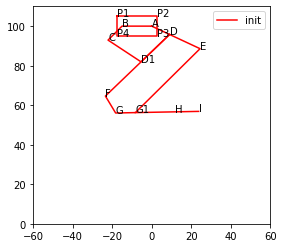

In [11]:
# Initial position solver and plotter
# Numerically solve for position of the points based on inputs
def solve_position(qi,qd,points):
    c = Constraint(eq)
    
    # Make qi constant because it is the input in fk
    constants = system.constant_values.copy()
    constants.update(dict([(q,qi[q]) for q in qi]))

    variables = list(qi.keys())+list(qd.keys())
    guess = []
    for v1 in variables:
        if v1 in qi:
            guess.append(qi[v1])
        elif v1 in qd:
            guess.append(qd[v1])
        else:
            guess.append(0)
    result1 = c.solve_numeric(variables,guess,constants) # Solve based on added constants

    sv_values = []
    for sv1 in system.get_state_variables():
        if sv1 in variables:
            sv_values.append(result1.x[variables.index(sv1)])
        else:
            sv_values.append(0) # Assume zero speed, will not affect point locations
    
    points_output = PointsOutput(points, constant_values=system.constant_values)
    points_output.calc(np.array([sv_values,sv_values]))
        
    x = {}
    for i, v1 in enumerate(variables):
        x[v1] = result1.x[i]

    return x, points_output.y[0,:,:]

def plot(ps, c='r', l='test'):
    ps_ADD1CB = np.array([
        ps[0,:],
        ps[3,:],
        ps[4,:],
        ps[2,:],
        ps[1,:],
        ps[0,:],
    ])
    ps_DEG1GF = np.array([
        ps[3,:],
        ps[5,:],
        ps[8,:],
        ps[7,:],
        ps[6,:],
        ps[3,:],
    ])    
    ps_G1HI = np.array([
        ps[8,:],
        ps[9,:],
        ps[10,:]
    ])    
    ps_P1P2P3P4 = np.array([
        ps[11,:],
        ps[12,:],
        ps[13,:],
        ps[14,:],
        ps[11,:]
    ])       

    plt.plot(ps_P1P2P3P4[:,0],ps_P1P2P3P4[:,1],c)
    for p, label in zip(ps_P1P2P3P4[:-1,:],['P1','P2','P3','P4']):
        plt.text(p[0],p[1],label)
             
    plt.plot(ps_ADD1CB[:,0],ps_ADD1CB[:,1],c)
    for p, label in zip(ps_ADD1CB[:-1,:],['A','D','D1','C','B']):
        plt.text(p[0],p[1],label)
        
    plt.plot(ps_DEG1GF[:,0],ps_DEG1GF[:,1],c)
    for p, label in zip(ps_DEG1GF[1:-1,:],['E','G1','G','F']):
        plt.text(p[0],p[1],label)
        
    plt.plot(ps_G1HI[:,0],ps_G1HI[:,1],c)
    for p, label in zip(ps_G1HI[1:,:],['H','I']):
        plt.text(p[0],p[1],label)
    
    plt.plot([],c,label=l)
    plt.axis('scaled')
    plt.xlim(-0.06*M_TO_L,0.06*M_TO_L)
    plt.ylim(-0.0*M_TO_L,h_drop+0.01*M_TO_L)
    plt.legend()
    
points_plot = [pNA,pNB,pNC,pND,pND1,pNE,pNF,pNG,pNG1,pNH,pNI,pNP1,pNP2,pNP3,pNP4]

# Test Plots
qs1,ps1 = solve_position(
    {xP:0, yP:h_drop, qP:qP_i, qG:qG_i, qH:qH_i}, # Input value
    {qF:90*DEG_TO_RAD, qE:-90*DEG_TO_RAD}, # Guess values
    points_plot # Points to calculate, use this order to ensure plot is correct
)

plt.figure()
plot(ps1, c='r', l='init')

In [12]:
rubber_properties = {
    "mass": 0.0295,        #
    "l_mass": 0.0775,        # length from pivot to mass (meters)
    "l_material": 0.005,   # length of material on joint
    "w_material": 0.030,   # w_material of material at joint
    "h_material": 0.00476,  # thickness of material at joint
    "gravity": 9.81,       # m/s
    "damping_guess": 0.00015, # Initial guess for optimization
    "spring_guess": 0.008,   # Initial guess for optimization
    "k": 0.011019806929039436, # Optimized result
    "b": 0.00014515254240395263 # Optimized result
}

transparancy_properties = {
    "mass": 0.0025,        # Used a dime as a weight (kg)
    "l_mass": 0.04,        # length from pivot to mass (meters)
    "l_material": 0.006,   # length of material on joint
    "w_material": 0.021,   # w_material of material at joint
    "h_material": 0.0004,  # thickness of material at joint
    "gravity": 9.81,       # m/s
    "damping_guess": 1.3e-6, # Initial guess for optimization
    "spring_guess":  1e-3,   # Initial guess for optimization
    "b": 3.211597004593089e-06, # Optimized result
    "k": 0.003867386434870078 # Optimized result
}

In [26]:
# Damping and spring constant
# angular damping, kg*m/s^2*m/(rad/s)
# angular spring constant, kg*m/s^2*m/rad

# Joint G, "actuator" joint
b = Constant(1e-5*KG_TO_W*M_TO_L**2/S_TO_T,'b',system)
k = Constant(1e-2*KG_TO_W*M_TO_L**2/S_TO_T**2,'k',system)

# Joint H, toe joint
# bh = Constant(1e-5*KG_TO_W*M_TO_L**2/S_TO_T,'bh',system)
# kh = Constant(1e-2*KG_TO_W*M_TO_L**2/S_TO_T**2,'kh',system) 

# Other joints
bj = Constant(1e-5*KG_TO_W*M_TO_L**2/S_TO_T,'bj',system)
kj = Constant(1e-2*KG_TO_W*M_TO_L**2/S_TO_T**2,'kj',system)

In [14]:
# Floor damping and spring constant 
bf = Constant(1e-5*KG_TO_W*M_TO_L**2/S_TO_T,'bf',system)
kf = Constant(1e-3*KG_TO_W*M_TO_L**2/S_TO_T**2,'kf',system)

In [15]:
# Dynamics
IP = Dyadic.build(P,Ixx_P,Iyy_P,Izz_P)
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)
IE = Dyadic.build(E,Ixx_E,Iyy_E,Izz_E)
IF = Dyadic.build(F,Ixx_F,Iyy_F,Izz_F)
IG = Dyadic.build(G,Ixx_G,Iyy_G,Izz_G)
IH = Dyadic.build(H,Ixx_H,Iyy_H,Izz_H)

BodyP = Body('BodyP',P,pPm,mP,IP,system)
BodyA = Body('BodyA',A,pAm,mA,IA,system)
BodyB = Body('BodyB',B,pBm,mB,IB,system)
BodyC = Body('BodyC',C,pCm,mC,IC,system)
BodyD = Body('BodyD',D,pDm,mD,ID,system)
BodyE = Body('BodyE',E,pEm,mE,IE,system)
BodyF = Body('BodyF',F,pFm,mF,IF,system)
BodyG = Body('BodyG',G,pGm,mG,IG,system)
BodyH = Body('BodyH',H,pHm,mH,IH,system)

# Contact Force
# Assume floor is at yN = 0
for v in [pNG, pNG1, pNH, pNI]:
    yV = v.dot(N.y)
    dV = (sympy.Abs(yV)-yV)/2 # If above floor, distance is 0, else y
    vV = v.time_derivative(N,system)
    
    # Floor acts as spring and damper only when in contact
    system.addforce(kf*dV*N.y,vV) # Spring vertical up
    system.addforce(-bf*dV*vV,vV) # Damper against velocity

# Joint Force
FwG = F.getw_(G)
system.addforce(-b*FwG,FwG)
system.add_spring_force1(k,(qG-qG_i)*F.z,FwG)

# GwH = G.getw_(H)
# system.addforce(-bh*GwH,GwH)
# system.add_spring_force1(kh,(qH-qs1[qH])*H.z,GwH)

DwF = D.getw_(F)
system.addforce(-bj*DwF,DwF)
system.add_spring_force1(kj,(qF-qs1[qF])*D.z,DwF)

DwE = D.getw_(E)
system.addforce(-bj*DwE,DwE)
system.add_spring_force1(kj,(qE-qs1[qE])*D.z,DwE)

GwG1 = G.getw_(G1)
system.addforce(-bj*GwG1,GwG1)
system.add_spring_force1(kj,(qG1-qG1.subs(qs1))*G.z,GwG1)

# Gravity
system.addforcegravity(-g*N.y)

In [16]:
tfinal = 10 # seconds
fps = 10 # frams simulated pers second

In [17]:
# Animation Function
def animate(states):
    points_output = PointsOutput(points_plot,system)
    outputs = points_output.calc(states)    
    
    fig = plt.figure()
    for pts in outputs:
        plt.cla()
        plot(pts, c='r', l='init')
        display(fig)
        clear_output(wait=True)

    return points_output,outputs
        
#points_output = animate(states)    

In [18]:
# Simulate
t = np.arange(0,tfinal,1/fps) # 30fps

# Initial conditions
states_init_d = qs1
states_init = []
for sv in state_variables:
    if sv in qs1:
        states_init.append(states_init_d[sv])
    else:
        states_init.append(0)

# Update system with rubber spring and damper coefficients
system.constant_values[b]=rubber_properties["b"]*KG_TO_W*M_TO_L**2/S_TO_T
system.constant_values[k]=rubber_properties["k"]*KG_TO_W*M_TO_L**2/S_TO_T**2 

# Update all other joints with transparency spring and dampener coefficients
system.constant_values[bj]=transparancy_properties["b"]*KG_TO_W*M_TO_L**2/S_TO_T
system.constant_values[kj]=transparancy_properties["k"]*KG_TO_W*M_TO_L**2/S_TO_T**2

f,ma = system.getdynamics()
f_s, f_c = system.state_space_post_invert(f,ma,eq_dd,return_lambda=True)

2021-04-22 16:09:07,712 - pynamics.system - INFO - getting dynamic equations
2021-04-22 16:09:11,752 - pynamics.system - INFO - solving a = f/m and creating function
2021-04-22 16:09:11,806 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-04-22 16:10:16,027 - pynamics.system - INFO - done solving a = f/m and creating function
2021-04-22 16:10:16,032 - pynamics.system - INFO - calculating function for lambdas


In [19]:
# Run the simulation with args: [b, k]
def run(args):
    # Apply unit scaling to args
    my_b = args[0]*KG_TO_W*M_TO_L**2/S_TO_T
    my_k = args[1]*KG_TO_W*M_TO_L**2/S_TO_T**2

    # Apply scaled values to system
    constants = system.constant_values.copy()
    constants[b] = my_b
    constants[k] = my_k

    # Print the scaled values to confirm they were calculated and applied correctly
    print('b: ' + str(constants[b]) + '\nk: ' + str(constants[k]))

    # Integrate
    states=pynamics.integration.integrate_odeint(f_s, states_init, t, rtol=tol, atol=tol, args=({'constants':constants},))
        
    return states

## Performance Measurement

- *Explain, in words, how your team will evaluate the success of your robot’s design. This could be by measuring the forces produced by your design, the speed at which it walks, its thrust:weight ratio, the height it can jump, etc. Explain, in words, how you will measure performance in simulation. How will you measure performance in experiments?*

  The primary goal of our system is to safely dissipate kinetic energy during an impact. There are two primary ways by which we quantify a successful landing: the peak acceleration and the settling time. The peak acceleration of the payload is an indicator of the impact forces that it experiences, and should be minimized. The settling time measures how quickly the system can dissipate energy and reach a non-oscillating state. This value should also be minimized.

  In both simulations and experiments, these two values can be determined by tracking the position of the center of the payload after the system is released. In physical experiments, this will be done using a camera and tracker software.

- *Are experimental vs. simulation metrics similar or vastly different? If different, how will you equate them?*

  If the simulation paramters are properly calibrated, these metrics can be directly compared.

- *Do you have more than one performance metric you must use as for design goals? If so, either identify the most important one or explain how you will balance two competing criteria.*

  *For example, if you need a robot to jump high AND far, which is more important, or how do you establish a relationship between these two possibly competing goals?*

  The primary metric for our system is the peak acceleration, since its main goal is to lessen the impact forces transmitted to the load. The settling time is less important as some oscillation is acceptable during landing.

  ... select weights for the two parameters? like 80/20 or 90/10?

- *Explain, in math, the measurable performance metric(s) by which your team can estimate performance.*

  The peak acceleration can be determined by calculating the second derivative of the position, then finding the maximum magnitude reached. This derivative can be approximated for each time step based on the change in position.

  $Peak\ Acceleration: A_{max} = max \left( \left\| \frac{d^2}{d^2t} \langle x(t), y(t) \rangle \right\| \right)$

  Approximation:

  $V_i = \frac{\sqrt{(x_i - x_{i-1})^2 + (y_i - y_{i-1})^2}}{t_i - t_{i-1}}$

  $A_i = \left| \frac{ V_i - V_{i-1} }{t_i - t_{i-1}} \right|$

  $A_{max} = max \left( A \right)$

  The settling time for the system can be determined by finding time elapsed between the inital peak in the displacement signal and time at which the signal has decayed to an amplitude less then 5% of the amplitude of the initial peak. The times at which peaks occur can be found based on when the velocity is equal to 0. Amplitudes are approximated from adjacent peaks since the displacement at equilibrium may not be zero. 

  $Displacement: D(t) = \left\| \langle x(t), y(t) \rangle \right\|$

  $Time\ Values\ for\ Peaks: P = \left\{ t \ | \ V(t) = 0 \right\}$

  $First\ Peak: p1 = P_1$

  $Second\ Peak: p2 = first\ P_i\ such\ that\ \left( \left| \frac{D(P_{i+1}) - D(P_i)}{2} \right| \right) < 0.05 \left( \left| \frac{D(P_2) - D(P_1)}{2} \right| \right)$

  $Settling\ Time = p2 - p1$

- Write, in code, a function that will evaluate the performance of your current system (as simulated in System Dynamics II).

In [ ]:
# Run a simulation with given args and get the performance metrics
# args = [b, k]
def measure_perf(args):
    # Unpack args
    cb = args[0]
    ck = args[1]

    # Print input values
    print('-----')
    print('Starting using args: ' + str(args))

    # Default metric values
    amax = 10000
    st = 10000
    ymin = 0

    # Range penalty conditions - disabled since we are running a global search over limited ranges
    # limit parameter ranges
    # if cb>0.001:
    #     res = 10000
    #     print('b too large')
    # elif ck>0.1:
    #     res = 10000
    #     print('k too large')
    # elif cb<=0 or ck<=0:
    #     res = 10000
    #     print('b or k too small')
    # else:

    try:
        # Run the simulation trial
        states = run(args)

        # Get the x and y coordinates of the payload
        x = states[:, 0]
        y = states[:, 1]

        points_output = PointsOutput([pNE],system)
        outputs = points_output.calc(states)
        pNE_y = np.array(outputs)[:, 0, 1]
        ymin = np.min(pNE_y)

        # Calculate the displacement, velocity, and acceleration magnitudes at each time step
        disp = np.sqrt(np.square(x) + np.square(y))
        dmin = float(np.min(disp))
        dmint = float(t[np.argmin(disp)])
        vel = np.divide(np.sqrt(np.square(x[1:]-x[:-1]) + np.square(y[1:]-y[:-1])), t[1:]-t[:-1])
        acc = np.abs(np.divide(vel[1:]-vel[:-1], t[2:]-t[1:-1]))
        amax = float(np.max(acc))
        amaxt = float(t[2:][np.argmax(acc)])

        # Find the maximum acceleration
        amax = float(np.max(acc))

        # Find the peaks in the position/displacement signal by determining when
        # the velocity switches from increasing to decreasing or vice versa
        peaks = []
        for i in range(2, len(vel)):
            if np.sign(vel[i] - vel[i-1]) != np.sign(vel[i-1] - vel[i-2]) and t[1:][i] > dmint:
                peaks.append(i-1)

        t1 = amaxt
        try:
            t2 = t[peaks[-1]]
            a1 = np.abs(disp[peaks[1]] - disp[peaks[0]])
            a2 = np.abs(disp[peaks[-1]] - disp[peaks[-2]])
            for i in range(2, len(peaks)):
                t2 = t[peaks[i]]
                a2 = np.abs(disp[peaks[i]] - disp[peaks[i-1]])
                if a2 < (0.05 * a1):
                    break
            if a2 < (0.05 * a1):
                st = t2 - t1
            else:
                raise IndexError
        except IndexError:
            st = t[-1] - t1
            print('system did not settle')

        # Print the performance metrics
        print('amax: ' + str(amax))
        print('st: ' + str(st))
        print('ymin: ' + str(ymin))

        # Plot the displacement signal, peaks, time of impact, and time at which system has settled
        plt.plot(t, disp)
        plt.scatter(t[peaks], disp[peaks])
        plt.vlines([t1, t1+st], np.min(disp), np.max(disp))
        plt.hlines([ymin], np.min(t), np.max(t))
        plt.show()

        if ymin < 0:
            # If knee passes through ground, give a penalty of 10000
            res = 10000
        else:
            # Compute a single performance score
            res = 0.5*amax + 0.5*((st*15)+500) # scale st to same range as amax, 50-50 weighted average

        print('res: ' + str(res))
    except scipy.linalg.LinAlgError:
        # Give a penalty of 10000
        res = 10000
        print('integration error')

    # Return the performance score and the three metrics
    return res, amax, st, ymin

## Constraints

- Brainstorm and describe your team’s design constraints. Constraints are aspects of your design that are “bounded” by some physical limit (eg, the size of robot you can cut on a given laser cutter, the range of motion of a typical foldable hinge joint)



- Explain, in words, how you will track violation of design constraints. For example, lets say your optimization routine suggests a design that cannot be made in a single sheet of paper. Will you

  - parameterize your design space in such a way that  translates to a bounded design range?

  - penalize design performance when design parameters are outside of that range

  - explicitly bound your parameter space?

- Execute the full optimization routine, using the code above, that

  - permits you to parameterize your design space in one or more variable

  - generates a scalar performance metric that implements your goal as stated above.

  - selects an optimization approach based on your decisions above. This may be a global search or use one of the many optimization routines available in Python.

  - bounds or penalizes designs outside of a permissable range

  - Run your optimization and determine the optimal parameter value(s)

In [ ]:
# Initialize arrays to hold simulation results
yy = []
amax_res = []
st_res = []
ymin_res = []

# Define parameter search ranges
x1 = np.linspace(0, 0.0008, 20) # b
x2 = np.linspace(0.01, 0.05, 20) # k

# Create a list of all parameter value combinations
xx = []
for xx1 in x1:
    for xx2 in x2:
        xx.append([xx1, xx2])

In [ ]:
# Create results file
f = open('results.csv', 'w+')
f.write('b,k,Max Acceleration,Settling Time,Min Y of Knee,Performance Score\n')
f.close()

In [ ]:
# Run all simulation trials
for ii in tqdm(xx, desc='Running simulation trials'):
    # Run simulation
    perf = measure_perf(ii)

    # Append results to lists
    yy.append(perf[0])
    amax_res.append(perf[1])
    st_res.append(perf[2])
    ymin_res.append(perf[3])

    # Append results to file
    f = open('results.csv', 'a+')
    f.write(str(ii[0]) + ',')
    f.write(str(ii[1]) + ',')
    f.write(str(perf[1]) + ',')
    f.write(str(perf[2]) + ',')
    f.write(str(perf[3]) + ',')
    f.write(str(perf[0]) + '\n')
    f.close()

In [ ]:
# Format lists of values
yy = np.array(yy)
xx = np.array(xx)
b_range = list(x1)
k_range = list(x2)
b_trials = list(xx[:, 0])
k_trials = list(xx[:, 1])
amax_res = list(amax_res)
st_res = list(st_res)
ymin_res = list(ymin_res)
perf = list(yy)

# Print all results
print('b_range = ' + str(b_range))
print('k_range = ' + str(k_range))
print('b_trials = ' + str(b))
print('k_trials = ' + str(k))
print('amax_res = ' + str(amax_res))
print('st_res = ' + str(st_res))
print('ymin_res = ' + str(ymin_res))
print('perf = ' + str(perf))

b_range = [0.0, 4.210526315789474e-05, 8.421052631578948e-05, 0.0001263157894736842, 0.00016842105263157895, 0.0002105263157894737, 0.0002526315789473684, 0.00029473684210526316, 0.0003368421052631579, 0.00037894736842105265, 0.0004210526315789474, 0.00046315789473684214, 0.0005052631578947368, 0.0005473684210526316, 0.0005894736842105263, 0.0006315789473684211, 0.0006736842105263158, 0.0007157894736842105, 0.0007578947368421053, 0.0008]
k_range = [0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05]
b = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.210526315789474e-05, 4.210526315789474e-

Load results from a previous simulation run.

In [25]:
b_range = [0.0, 4.210526315789474e-05, 8.421052631578948e-05, 0.0001263157894736842, 0.00016842105263157895, 0.0002105263157894737, 0.0002526315789473684, 0.00029473684210526316, 0.0003368421052631579, 0.00037894736842105265, 0.0004210526315789474, 0.00046315789473684214, 0.0005052631578947368, 0.0005473684210526316, 0.0005894736842105263, 0.0006315789473684211, 0.0006736842105263158, 0.0007157894736842105, 0.0007578947368421053, 0.0008]
k_range = [0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05]
b_trials = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 4.210526315789474e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 8.421052631578948e-05, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.0001263157894736842, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.00016842105263157895, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002105263157894737, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.0002526315789473684, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.00029473684210526316, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.0003368421052631579, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.00037894736842105265, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.0004210526315789474, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.00046315789473684214, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005052631578947368, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005473684210526316, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0005894736842105263, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006315789473684211, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0006736842105263158, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007157894736842105, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0007578947368421053, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008]
k_trials = [0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05, 0.01, 0.012105263157894737, 0.014210526315789474, 0.01631578947368421, 0.01842105263157895, 0.020526315789473684, 0.02263157894736842, 0.024736842105263158, 0.026842105263157896, 0.02894736842105263, 0.031052631578947366, 0.03315789473684211, 0.035263157894736843, 0.03736842105263158, 0.039473684210526314, 0.041578947368421056, 0.04368421052631579, 0.045789473684210526, 0.04789473684210526, 0.05]
amax_res = [515.9373504763014, 517.6357700973936, 519.3185427606636, 520.979397383425, 522.6324823965339, 524.2712447516761, 525.8961252843518, 527.5072824556654, 529.1086329334494, 530.6950065007201, 532.2679596494712, 533.8353716620456, 535.3939601909606, 536.9445548210621, 538.4876128557734, 540.0227043995345, 541.552290075133, 543.0792204437145, 544.6006858567101, 546.1104528731262, 523.2927055107324, 524.8941514773148, 526.4608863752682, 528.0357946572485, 529.6143775924188, 531.1683825122087, 532.7149988031522, 534.2556885400031, 535.8145835316496, 537.319278573574, 538.8090067084582, 540.3198578472317, 541.8136095354962, 543.313181773302, 544.8096531088016, 546.3413793612584, 547.807249497272, 549.2517988724356, 550.7140747893282, 552.2622578442555, 530.1969433074853, 531.7556928168472, 533.2879475864413, 534.7656075963564, 536.2602490866942, 537.797782238157, 539.2783963852485, 540.7383076029995, 542.1852386721881, 543.6296749058201, 545.0940606780738, 546.5974584915134, 548.052969889008, 549.5042713709943, 550.9691871747401, 552.3851696953725, 553.7671200654802, 555.2162726997375, 556.6423246904442, 558.0008585468705, 536.7895386758394, 538.289225692837, 539.769678560741, 541.195936698077, 542.6264979135399, 544.0595676621964, 545.5049123432184, 546.9300320179007, 548.3188250620772, 549.7295771582941, 551.1516944297994, 552.6161361740157, 554.0033555129904, 555.3708923930049, 556.8033409387003, 558.1933783247327, 559.5797524700284, 560.9500153561863, 562.2989757378215, 563.6504557378784, 543.1560488320883, 544.551373886895, 545.9517891181721, 547.3350940600186, 548.7271928222102, 550.1309474861653, 551.4874593614832, 552.881159380142, 554.2727777799162, 555.6456579616741, 557.0225105267157, 558.3997935265072, 559.7190995994167, 561.0776061347265, 562.4133157472456, 563.7788000582085, 565.1237535787864, 566.4355176348149, 567.7069198182294, 569.0183616556333, 549.1943929789328, 550.5442360406308, 551.9040928612166, 553.2275954064495, 554.6520789920027, 555.9020200168657, 557.2586706997688, 558.6204876254816, 559.960731844961, 561.29506414694, 562.6150920432606, 563.9410325052054, 565.2343938291746, 566.634215996741, 567.8429198703863, 569.14183387498, 570.4192003189177, 571.7041830322661, 572.9840794836094, 574.212775571697, 555.0044432690306, 556.3187434456896, 557.6181223642195, 558.918455917358, 560.2274932747617, 561.5533407293408, 562.8642583516038, 564.186190745469, 565.4773786813562, 566.7593994824331, 568.047286407306, 569.3330657565077, 570.5837640243792, 571.824100132029, 573.119674206234, 574.3137803029658, 575.5634852379272, 576.7893166062565, 578.0717101892313, 579.228777566617, 560.602943775302, 561.8963831475489, 563.192688100561, 564.4242947559783, 565.7575320761042, 566.9777561296339, 568.2337712919243, 569.5105748802821, 570.7537579941534, 572.0359006449021, 573.2639702836346, 574.4708238054586, 575.7107239470233, 576.8957563690519, 578.1174656137789, 579.3010754219081, 580.5233160702305, 581.7197814729107, 582.9046483006872, 584.083132777652, 566.0271926972566, 567.2722292171542, 568.5175676853422, 569.7324214020252, 571.0036158095788, 572.2138281827253, 573.4506645167309, 574.6398032501418, 575.855848497336, 577.056587982647, 578.2536164949272, 579.4395959676852, 580.6291556214662, 581.7991317683286, 582.9638856132736, 584.1141594882873, 585.291270265647, 586.4510595499769, 587.5621993284301, 588.7354872683962, 571.2646592873417, 572.4392034248874, 573.6632045050875, 574.8987853935155, 576.0751818319462, 577.2611410329756, 578.4271189534765, 579.580517131236, 580.7859821199793, 581.9192844281694, 583.5537539818034, 584.2153666566301, 585.3908300828512, 586.4936267066696, 587.6409225719018, 588.7578875562683, 589.9089591448061, 590.9978041133335, 592.13394998492, 593.2042027183263, 576.2826957162795, 577.4810801562356, 578.6482472076224, 579.8033075971887, 580.962641381291, 582.1194059211881, 583.2189918904472, 584.3835145670972, 585.5082735650086, 586.6591986088645, 587.7551696616632, 588.8719081520072, 589.9378878276974, 591.0355390459192, 592.1558198563908, 593.2145310361901, 594.3339797250056, 595.4061184917591, 596.4736354557964, 597.5314672723879, 581.1795850313398, 582.2874167486824, 583.4419431247047, 584.5577636370467, 585.6598192160674, 586.7753662613899, 587.8868589293972, 588.9539035959035, 590.0831285285333, 591.1559218073406, 592.2492128569723, 593.3205957125601, 594.3506824869962, 595.4461250946929, 596.5214622257463, 597.5298860741242, 598.5736506375035, 599.6146278350009, 600.6764098865339, 601.7346566604691, 585.829846314949, 586.9262132099143, 588.0635255808493, 589.1490409877011, 590.1990956901119, 591.2519888100722, 592.3624180459318, 593.3968120857973, 594.4770640888754, 595.5233094300568, 596.5638353298822, 597.6151119951804, 598.6252861653495, 599.6723527558574, 600.7215207879328, 601.7265829684492, 602.7133657144956, 603.7148710157782, 604.7613040655448, 605.7082132201124, 590.3955110413104, 591.4584347504193, 592.5143856122055, 593.553068974226, 594.6105745307176, 596.1414211150463, 596.7079160371218, 597.6676307618719, 598.7240380102364, 599.7174482184685, 600.761502462434, 601.7704682446714, 602.7654876624746, 603.7490464048121, 604.7283910672213, 605.7471870779499, 606.7269746991894, 607.7032035504811, 608.6747265580335, 609.652305307174, 594.7393346612282, 595.7847660028216, 596.790984486637, 597.8191295133504, 598.8351825745102, 599.8127994200023, 600.8404953570417, 601.8353517509083, 602.8385346585975, 603.8122747296686, 604.7636624603085, 605.769115333826, 606.7105880952802, 607.7108751305661, 608.6708670804178, 609.6213699908589, 610.5627322608636, 611.5442583144916, 612.4363853633164, 613.4160138436118, 598.9695649937179, 599.932547282483, 600.9414876785021, 601.9461938797465, 602.9153124156204, 603.8919391521113, 604.8318836700349, 605.8244848320155, 606.7915856536067, 607.7399454183112, 608.6951591127404, 609.6443180515166, 610.57824449004, 611.5152551610009, 612.4339451856207, 613.3792856219427, 615.1735886154064, 615.2158685514028, 616.1088925386966, 617.0307850318158, 603.042482094107, 603.9969193574011, 604.9676184716219, 605.9136644777476, 606.8573978756115, 607.8075286840797, 608.7178146509766, 609.6842015429336, 610.6194040327114, 611.5142264896627, 612.4277135160334, 613.3901629917782, 614.2813444784974, 615.2067080506882, 616.1057036574464, 616.9990488286741, 617.8984909488428, 618.7868003631843, 619.6730364395561, 620.5147858449247, 606.9420713245673, 607.8756981775504, 608.8308885540006, 609.7503645684292, 610.6835751427212, 611.602720192453, 612.5029019869011, 613.3821146564283, 614.3174541462924, 615.1833983062882, 616.102940398677, 616.9998675084014, 617.8873555772773, 618.7424589757209, 619.6343233930327, 620.5125041739061, 621.3791559210051, 622.2523924726906, 623.1132956142611, 623.9271744005796, 610.7553037751278, 611.677360233951, 612.5689856771135, 613.4689437519131, 614.348208332031, 615.2382042640437, 616.1290963665692, 616.9940118106484, 617.8862771333211, 619.7024896570696, 619.6305491488315, 620.4785364357662, 621.3378109254193, 622.2120250517112, 623.0476325082931, 623.8943259503201, 624.7456159821105, 625.6008877480364, 626.3969836293635, 627.2625598419999, 614.4497776281361, 615.3181046750589, 616.1978099173994, 617.0471156424385, 617.9076105220078, 618.7807606905628, 619.6497942898812, 620.5083396386237, 621.370252236231, 622.1895898225372, 623.0472725124179, 623.8885853830832, 624.6895119172177, 625.5276931800294, 626.3669234472904, 627.1758053209986, 628.0007274403046, 628.8222126653119, 629.62236100154, 630.4266323669992]
st_res = [8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.5, 8.7, 8.7, 8.7, 8.0, 6.7, 5.4, 5.3, 4.8, 4.7, 4.0, 3.3, 2.9000000000000004, 8.7, 8.7, 8.7, 8.7, 8.7, 7.6000000000000005, 7.2, 7.7, 6.5, 7.000000000000001, 6.8, 6.5, 6.3, 5.4, 5.3, 4.9, 4.7, 4.6000000000000005, 4.5, 2.9000000000000004, 8.7, 8.7, 7.8, 7.7, 7.1000000000000005, 6.7, 6.8, 6.0, 6.5, 6.3, 6.0, 5.8, 6.7, 5.9, 5.3, 5.2, 5.0, 4.9, 3.6000000000000005, 3.5, 7.8999999999999995, 6.0, 6.7, 5.5, 5.1000000000000005, 5.8, 5.4, 5.1000000000000005, 5.7, 5.5, 5.3, 5.1000000000000005, 7.1000000000000005, 7.7, 7.3999999999999995, 4.3, 1.0, 3.7, 3.6000000000000005, 3.5, 7.2, 6.8999999999999995, 5.6000000000000005, 5.6000000000000005, 5.2, 4.8, 5.5, 4.3, 4.1000000000000005, 4.8, 4.6000000000000005, 4.4, 5.0, 4.8, 4.7, 4.6000000000000005, 3.8, 3.7, 3.6000000000000005, 3.6000000000000005, 6.5, 5.5, 4.9, 5.2, 5.2, 4.9, 4.6000000000000005, 4.4, 4.2, 4.0, 4.6000000000000005, 5.2, 5.1000000000000005, 4.6000000000000005, 6.1000000000000005, 5.3, 4.5, 4.4, 4.3, 4.2, 6.5, 5.6000000000000005, 5.0, 4.6000000000000005, 4.2, 3.9000000000000004, 4.7, 4.4, 3.3, 4.0, 3.9000000000000004, 5.3, 4.4, 4.2, 4.1000000000000005, 4.7, 4.6000000000000005, 4.4, 4.3, 3.6000000000000005, 4.9, 5.7, 5.1000000000000005, 4.6000000000000005, 4.3, 4.0, 3.7, 4.5, 3.4000000000000004, 3.2, 5.6000000000000005, 5.0, 4.4, 3.5, 3.4000000000000004, 3.3, 3.3, 3.2, 3.0999999999999996, 3.0, 5.1000000000000005, 4.3, 3.8, 4.7, 4.3, 4.0, 3.8, 3.6000000000000005, 3.4000000000000004, 3.3, 5.6000000000000005, 5.4, 4.5, 4.3, 3.5, 3.4000000000000004, 3.3, 2.5, 2.9000000000000004, 2.4, 5.2, 4.4, 3.9000000000000004, 3.5, 3.2, 4.1000000000000005, 2.8, 3.7, 3.5, 3.3, 5.8, 5.5, 4.5, 4.4, 3.5, 2.7, 2.6, 2.6, 4.6000000000000005, 4.2, 5.4, 4.5, 4.0, 3.6000000000000005, 3.3, 3.0999999999999996, 2.9000000000000004, 3.7, 3.5, 8.7, 5.9, 5.7, 5.4, 4.5, 4.0, 2.7, 2.7, 3.3, 3.2, 3.0999999999999996, 5.6000000000000005, 4.7, 4.1000000000000005, 3.7, 3.4000000000000004, 3.0999999999999996, 2.9000000000000004, 3.4000000000000004, 2.6, 6.2, 4.8, 4.6000000000000005, 8.7, 5.1000000000000005, 2.8, 2.0, 2.7, 3.4000000000000004, 3.3, 2.5, 3.6000000000000005, 4.8, 4.2, 3.8, 3.4000000000000004, 3.2, 3.0, 2.8, 2.7, 4.4, 7.8999999999999995, 5.7, 4.7, 5.8, 2.9000000000000004, 2.5, 2.5, 1.9, 3.3, 3.2, 3.7, 5.0, 4.3, 3.9000000000000004, 3.5, 3.3, 3.0999999999999996, 2.9000000000000004, 2.7, 2.6, 4.2, 4.8, 6.3, 4.7, 2.1, 2.1, 2.0, 2.4, 3.3, 3.2, 4.0, 3.2, 4.5, 4.0, 3.6000000000000005, 3.3, 3.0999999999999996, 2.9000000000000004, 2.8, 2.6, 4.4, 4.3, 4.1000000000000005, 4.0, 2.2, 2.1, 2.0, 2.0, 1.9, 2.6, 4.4, 3.4000000000000004, 2.8, 4.2, 3.6000000000000005, 3.4000000000000004, 3.2, 3.0, 2.8, 2.7, 2.6, 4.2, 3.2, 3.9000000000000004, 2.2, 2.1, 2.1, 2.0, 2.0, 1.9, 5.0, 3.6000000000000005, 3.0, 4.2, 2.3, 3.5, 3.4000000000000004, 3.0999999999999996, 2.9000000000000004, 2.7, 2.6, 3.4000000000000004, 3.3, 2.3, 2.2, 2.2, 2.1, 2.0, 2.0, 1.9, 5.8, 3.9000000000000004, 3.0999999999999996, 2.7, 2.4, 3.7, 2.0, 3.0999999999999996, 2.9000000000000004, 2.8, 2.7, 2.5, 3.5, 2.3, 2.3, 2.2, 2.1, 2.1, 2.0, 2.0, 7.2, 4.2, 3.3, 2.9000000000000004, 2.5, 3.8, 2.1, 3.2, 1.7999999999999998, 2.9000000000000004, 2.7, 2.6, 3.5, 2.4, 2.3, 2.2, 2.2, 2.1, 2.0, 2.0, 7.2, 4.9, 3.5, 3.0, 2.6, 2.3, 2.1, 2.0, 1.9, 2.9000000000000004, 2.8, 2.7, 3.5, 2.4, 2.3, 2.3, 2.2, 2.1, 2.1, 2.0]
ymin_res = [8.82930833189102, 13.894277728459004, 16.957529374635495, 18.94940379986879, 20.419081972130325, 21.573031936155957, 22.666213686941987, 23.422215808134023, 24.08528374666708, 24.710326478454686, 25.106819902358872, 25.48802318841233, 25.857294197499222, 26.203811814648066, 26.41369341062849, 26.616598515171628, 26.790479437888333, 26.987324408806266, 27.15193097246514, 27.33683534059203, 11.475383385613402, 15.646554024243938, 18.25183524207194, 19.94655720532768, 21.180328068054422, 22.222602788900502, 23.20694521281616, 23.88629909883169, 24.50365347287883, 25.067134987630723, 25.436534379542536, 25.787732482566035, 26.131777623386483, 26.45092955117478, 26.63737015371841, 26.830046600109913, 26.9948965330322, 27.164517078656026, 27.33685529286046, 27.502152850217552, 13.576584870807634, 17.10465091658956, 19.317096914480924, 20.827283185984644, 21.855375321238327, 22.80396238890139, 23.701838821294096, 24.310771534459626, 24.8798572691703, 25.382230986625117, 25.72879387238921, 26.076825635600724, 26.38085927454629, 26.660471168109066, 26.848768949962366, 27.01006645457492, 27.185153271839642, 27.34127138705713, 27.500336520413214, 27.654778488304384, 15.341296141183024, 18.298455197230158, 20.215892697564165, 21.55167885393813, 22.48137019195133, 23.328431360540137, 24.132472039801797, 24.697941323235085, 25.218121079108275, 25.680045925891697, 26.001204352470687, 26.314014529449988, 26.612204401867302, 26.866516423014485, 27.03607594514, 27.19257196468478, 27.351830863833136, 27.51036647277324, 27.657483092797865, 27.803530141962597, 16.836985107195638, 19.339217403834446, 21.021123248573137, 22.171652070408186, 23.016378737027367, 23.795184919036775, 24.516267069418213, 25.04382628765004, 25.523081467318747, 25.947707960548534, 26.252323029321836, 26.54517731873135, 26.823444452010943, 27.054112333294015, 27.212488313370788, 27.37027869748523, 27.515397183151784, 27.659516368162627, 27.800519684528787, 27.93982914199506, 18.09458864139222, 20.246842573133158, 21.727042411874564, 22.74308776783842, 23.505961869844217, 24.222784879584246, 24.86880205935589, 25.346878716901056, 25.80181322135202, 26.19589184756254, 26.482528305530955, 26.75603123303381, 27.017404527809653, 27.223588324957497, 27.37735989767957, 27.521752450768204, 27.6619226938593, 27.801610744530592, 27.936704192963216, 28.05803355483017, 19.143634435262275, 21.056435796001633, 22.366840755348775, 23.24788170072734, 23.955222182280025, 24.614228041051895, 25.1888107043489, 25.63384089528539, 26.05300419588079, 26.424152170440948, 26.690927055453287, 26.948733218619047, 27.19349581738564, 27.386498300267558, 27.528506143116886, 27.667204984293114, 27.805696203186525, 27.935954528501153, 28.064454717084775, 28.165534903003962, 20.057153362906536, 21.752952488003025, 22.928854331251458, 23.70691404576181, 24.36090767632507, 24.972129781327673, 25.474231983696765, 25.88965262611308, 26.28090265100829, 26.63441076568442, 26.885279572972628, 27.125622537522098, 27.357642047311202, 27.540488334142832, 27.673601315981365, 27.805014448555667, 27.934996716961567, 28.0592987265387, 28.18172847303, 28.26617436651417, 20.85041187847714, 22.377302406770436, 23.431204899682488, 24.124968346962458, 24.73485944038226, 25.287496419684974, 25.741229872279366, 26.12526077163633, 26.492535744064263, 26.82695136134589, 27.063336524269243, 27.290091012226984, 27.5078132652266, 27.680269256667636, 27.808372028042868, 27.935799248342647, 28.05686108367211, 28.17628271083666, 28.291879858832424, 28.363540070023898, 21.554143518117012, 22.92594892215227, 23.877084238461737, 24.514165932735352, 25.068532149824655, 25.58889694419981, 25.977664309648056, 26.337739790259867, 26.681942473462367, 27.003831363052345, 27.228426673803853, 27.441534159726142, 27.647986036246323, 27.81377105996405, 27.935105154763328, 28.054174295735056, 28.1707986944772, 28.28552994384805, 28.396192953580204, 28.45490033261802, 22.170812315545795, 23.41919526284644, 24.285225711714553, 24.861246424785723, 25.382047140008858, 25.84366291516802, 26.198872332584294, 26.540284993572104, 26.85961034841219, 27.16191664122124, 27.380413312781464, 27.58298432342394, 27.776584719619457, 27.93792525230154, 28.055456033325562, 28.16879810776077, 28.27904777663367, 28.386249124515572, 28.492030639581724, 28.54302448059857, 22.718849231449845, 23.853760747584403, 24.642890596783012, 25.18003618823998, 25.665983835392854, 26.06908859985065, 26.403531327231605, 26.72039407545582, 27.022149161557433, 27.3021142210698, 27.522688084558993, 27.716579991739223, 27.89643234611954, 28.057255910437316, 28.16661141786953, 28.27497277603561, 28.378454125475088, 28.482216255870824, 28.577450462742704, 28.62626258104358, 23.204868349295968, 24.25683888465558, 24.978960611774525, 25.47413537600269, 25.92622590433616, 26.278297362988233, 26.59202939379586, 26.888057028969282, 27.169279771510055, 27.43294265241025, 27.657162581258415, 27.835184482560372, 28.009604048657202, 28.165346281347993, 28.27178006134952, 28.373984006613433, 28.474021381539693, 28.57308141324869, 28.66030150942207, 28.706356060939683, 23.64089347789269, 24.614504384331738, 25.2800950259497, 25.74139659644695, 26.161402033320204, 26.4724816194678, 26.765867934922845, 27.04454430019024, 27.308903114239264, 27.562404224149418, 27.777384336688602, 27.948651733612458, 28.113098565283057, 28.266670457774225, 28.370405118688762, 28.46459001114945, 28.564678084817523, 28.658578646364344, 28.737371651154664, 28.78261098212799, 24.035519125195133, 24.936823245918227, 25.554148401290114, 25.990822722735665, 26.362867295778617, 26.650229338708755, 26.928893115376873, 27.192178276775497, 27.44264031153809, 27.67493861233905, 27.89207507278806, 28.054796244735776, 28.211221979125025, 28.36215759187019, 28.461425716420532, 28.556817546336912, 28.64810756697515, 28.738489633930797, 28.8110367519467, 28.85475777133708, 24.384260192278113, 25.228089396256618, 25.806737642309148, 26.22129225603759, 26.551859083933145, 26.821999822698185, 27.08046031485579, 27.328150729903484, 27.562995415632983, 27.792703841018774, 27.996413946660617, 28.15493061403421, 28.30197480246007, 28.444191327943518, 28.549749873087812, 28.64022773277249, 28.729637516783757, 28.814273181608897, 28.882179199498303, 28.92448241177058, 24.707617312770008, 25.498971334518544, 26.037262748255664, 26.431694635338573, 26.72924218363604, 26.982917146851936, 27.22464133847673, 27.456615217339362, 27.677244422614088, 27.888966700852116, 28.087535394355257, 28.246819845032938, 28.389130072284964, 28.524012997694413, 28.632532963396603, 28.71957556184079, 28.802469394548968, 28.885756276536636, 28.950403225729886, 28.989756622137776, 24.992014420101405, 25.743812076520705, 26.25204701223579, 26.628943256461252, 26.896068942294, 27.13357535394895, 27.36345849754081, 27.57976466184693, 27.78784277439472, 27.985253201028602, 28.173429758578934, 28.336867492442384, 28.468083958872164, 28.59678862394262, 28.710125415597652, 28.793624663169307, 28.873107682473748, 28.9533695964711, 29.015559653040413, 29.05418630165594, 25.255052940133133, 25.970533529455242, 26.448899527469617, 26.810917526283507, 27.052776552515677, 27.279188690916527, 27.49092751680772, 27.694888333049168, 27.892229349647103, 28.080423790908014, 28.256519607607483, 28.415803516507786, 28.545531912242936, 28.66761414086349, 28.786885843167326, 28.865285136801624, 28.94196222124412, 29.01685888809659, 29.077691442059603, 29.114962777444074, 25.49298988618067, 26.180393782215447, 26.632049412988028, 26.977695931200618, 27.2022198033077, 27.414667149233516, 27.61509056563485, 27.81007075142982, 27.992300707325303, 28.17246015362614, 28.339441881095283, 28.494993389196214, 28.615284756075166, 28.73563669161547, 28.849909996636157, 28.928926672762763, 29.004846061723352, 29.078053366167392, 29.136599793673213, 29.173194273719226]
perf = [573.2186752381507, 574.0678850486968, 574.9092713803318, 575.7396986917124, 576.5662411982669, 577.385622375838, 578.198062642176, 577.5036412278328, 579.8043164667247, 580.59750325036, 581.3839798247357, 576.9176858310228, 567.9469800954803, 558.972277410531, 558.9938064278867, 556.0113521997673, 556.0261450375665, 551.5396102218572, 547.0503429283551, 544.8052264365631, 576.8963527553663, 577.6970757386574, 578.4804431876341, 579.2678973286243, 580.0571887962094, 572.5841912561043, 570.3574994015761, 574.8778442700016, 566.6572917658248, 571.1596392867871, 570.4045033542291, 568.9099289236158, 568.1568047677481, 562.156590886651, 562.1548265544009, 559.9206896806293, 559.153624748636, 559.1258994362179, 559.1070373946641, 547.8811289221278, 580.3484716537426, 581.1278464084236, 575.1439737932207, 575.1328037981782, 571.3801245433472, 569.1488911190785, 570.6391981926242, 565.3691538014998, 569.842619336094, 569.0648374529101, 567.5470303390368, 566.7987292457567, 574.276484944504, 569.0021356854971, 565.23459358737, 565.1925848476862, 564.3835600327401, 564.3581363498688, 555.3211623452221, 555.2504292734352, 577.6447693379197, 564.1446128464186, 570.1348392803704, 561.8479683490385, 559.5632489567699, 565.5297838310983, 563.2524561716092, 561.7150160089503, 566.9094125310386, 566.114788579147, 565.3258472148997, 564.5580680870078, 580.2516777564952, 585.4354461965024, 583.9016704693502, 561.3466891623664, 537.2898762350142, 558.2250076780931, 558.1494878689107, 558.0752278689392, 575.5780244160442, 574.0256869434475, 564.9758945590861, 565.6675470300092, 563.3635964111052, 561.0654737430826, 566.9937296807416, 558.690579690071, 557.8863888899581, 563.8228289808371, 563.0112552633578, 562.1998967632536, 567.3595497997084, 566.5388030673632, 566.4566578736228, 566.3894000291043, 561.0618767893932, 560.9677588174075, 560.8534599091147, 561.5091808278166, 573.3471964894663, 566.5221180203155, 562.7020464306083, 565.6137977032247, 566.3260394960014, 564.7010100084328, 563.1293353498844, 562.3102438127407, 561.4803659224805, 560.6475320734701, 565.8075460216303, 570.9705162526027, 570.8671969145873, 567.8171079983705, 579.6714599351931, 574.32091693749, 568.9596001594589, 568.852091516133, 568.7420397418048, 568.6063877858485, 576.2522216345153, 570.1593717228448, 566.3090611821098, 563.959227958679, 561.6137466373809, 560.0266703646704, 566.682129175802, 565.0930953727345, 557.4886893406781, 563.3796997412165, 563.273643203653, 574.4165328782539, 568.2918820121896, 567.4120500660144, 567.3098371031169, 572.4068901514829, 572.2817426189636, 571.3946583031283, 571.2858550946157, 566.6143887833085, 567.051471887651, 573.6981915737745, 569.8463440502805, 566.7121473779891, 565.1287660380522, 563.488878064817, 561.8668856459622, 568.505287440141, 560.8768789970767, 560.017950322451, 578.6319851418173, 574.7354119027293, 570.8553619735117, 564.697878184526, 564.5587328068895, 564.400537710954, 565.0116580351153, 564.8598907364553, 564.7023241503437, 564.541566388826, 571.2635963486283, 565.8861146085771, 562.7587838426712, 570.1162107010126, 567.7518079047894, 566.1069140913626, 565.2253322583654, 564.3199016250709, 563.427924248668, 563.2782939913235, 581.1268082474636, 580.2197979838427, 574.0645778107331, 573.1495658841643, 567.7319428066369, 567.5570797441437, 567.3956351328235, 561.9755297749884, 565.531099664215, 562.3677436341982, 574.6323296436708, 569.2196017124437, 566.0816022525437, 563.6993926967577, 562.0375909159732, 569.3805705164878, 560.2135594767383, 567.5402585656179, 566.6429910599896, 565.7096422140846, 585.2768769909017, 583.357683328315, 576.4454150414256, 576.2468133533348, 570.0704612859508, 564.6289437781342, 564.454479572403, 564.9989020566668, 580.56697499246, 578.1021013591632, 578.6413478581397, 572.4905400781179, 569.3241236038111, 566.9016537985943, 565.2313206906455, 564.309702960594, 563.3594959452237, 569.9417572835487, 569.0041367825042, 608.5795993044322, 588.1275848308317, 587.1859540760036, 585.4689439138488, 579.2677695229596, 576.0779099281954, 566.8572655180951, 567.4169898625028, 572.4530592458796, 572.2368177278981, 572.015733636194, 582.5897925156698, 576.3937083743413, 572.4709715623524, 570.0288818185234, 568.3299096080336, 566.637683130695, 565.6934294646986, 569.9769517979518, 564.5415642642666, 592.0779609036704, 582.1246064284862, 581.1602978562801, 612.4253412434981, 585.9730625473464, 569.2607311128731, 563.764943037062, 569.5368253187518, 575.3073139175004, 575.0882049432669, 569.6173283302346, 569.9149231574745, 579.4631066049571, 575.5317627904246, 573.0745204938505, 570.5995478450559, 569.6259944050362, 568.681209022966, 567.6984060428986, 567.4885320444378, 580.7616547150284, 607.5319176649411, 591.5575559975903, 584.5626430826748, 593.3361763779287, 572.1107603939664, 569.6132914842246, 570.1066828572477, 566.107435507889, 577.1306520327723, 576.8541066100562, 572.9477555206552, 583.2292173752096, 578.5071928061027, 576.0265344871129, 573.5552872653589, 572.8207105575232, 571.6039580185609, 570.5838153809359, 569.6120190051182, 569.3587241092342, 581.880751231217, 586.8852341223358, 598.6327438312373, 587.1245232024061, 568.1141955336107, 568.623593538975, 568.3634873495947, 571.8516017752406, 579.0873632790167, 578.826152653587, 577.3696673306141, 571.8923830014107, 582.1454922433185, 578.9095647566752, 576.4175912872552, 574.6563997100011, 573.6702476785208, 572.6676758754542, 572.4192673292987, 571.4061373648343, 585.3818312301543, 585.134557666913, 584.1052940476401, 583.8554375652831, 570.8354335402089, 570.5606849954295, 570.2813661304318, 570.7721291572458, 570.4681926816581, 576.2080069218059, 582.484782496859, 575.4662736412415, 571.4707438392511, 582.4730969398732, 578.4576562078103, 577.4459695760556, 576.4159418350175, 575.4122424160078, 574.3957928268034, 574.1199727091556, 573.8475795563702, 586.3221590257583, 579.28912224502, 585.0076275805004, 572.7169725928104, 572.4396428109713, 573.3367943077033, 572.6079342757014, 573.0544462693483, 572.7653925159079, 589.0212410470535, 578.9984596787006, 574.9838092358109, 584.4568322388739, 570.6786989378057, 580.1537643420398, 579.8589073254883, 578.0921007714668, 577.0597020163557, 576.0071132448313, 575.7138567580166, 582.1950814958891, 581.8906722392487, 574.8533540253441, 574.5528518287232, 574.999524414337, 574.6992454744213, 574.3934001815921, 574.8365182197781, 574.5073929224624, 596.9710356622836, 583.1878490887752, 577.6654442770002, 575.1251822842146, 573.3417875713606, 583.5513600962265, 571.2514509934506, 579.9410573282141, 578.9087270731462, 578.5916991531441, 578.3014701993385, 577.2499337542007, 585.1936777886386, 576.6212294878604, 577.0671616965163, 576.756252086953, 576.4395779605026, 576.8761962363453, 576.5566478071305, 576.9635872002898, 609.3776518875638, 587.3386801169755, 581.0344928385567, 578.4844718759566, 575.9241041660155, 586.1191021320219, 573.8145481832846, 582.4970059053242, 572.4431385666605, 581.6012448285348, 580.0652745744158, 579.7392682178831, 586.9189054627096, 579.1060125258556, 578.7738162541466, 578.44716297516, 578.8728079910552, 578.5504438740181, 578.1984918146818, 578.631279921, 611.224888814068, 594.4090523375294, 584.3489049586997, 581.0235578212192, 578.4538052610039, 576.6403803452814, 575.5748971449407, 575.2541698193119, 574.9351261181155, 582.8447949112685, 582.5236362562089, 582.1942926915416, 588.5947559586089, 580.7638465900147, 580.4334617236452, 580.8379026604994, 580.5003637201523, 580.1611063326559, 580.56118050077, 580.2133161834996]

- Generate a figure that shows that your parameter value is at or very near the optimal value.

In [27]:
positive = list(np.array(ymin_res)>0)
color = []
for p in positive:
    if p:
        color.append('blue')
    else:
        color.append('yellow')
color[np.argmin(perf)] = 'red'

blue_patch = mpatches.Patch(color='blue', label='Landed')
yellow_patch = mpatches.Patch(color='yellow', label='Collapsed')
red_patch = mpatches.Patch(color='red', label='Optimal')

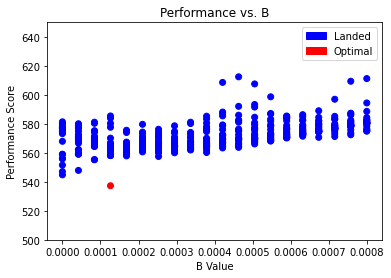

In [28]:
plt.scatter(b_trials,perf, c=color)
plt.ylim([500, 650])
plt.title('Performance vs. B')
plt.ylabel('Performance Score')
plt.xlabel('B Value')
plt.legend(handles=[blue_patch, red_patch])
plt.savefig('b-perf.png')

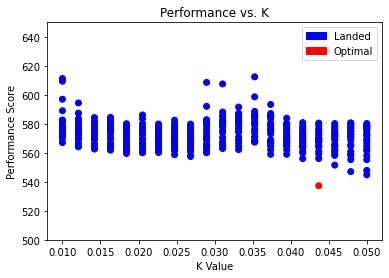

In [29]:
plt.scatter(k_trials,perf, c=color)
plt.ylim([500, 650])
plt.title('Performance vs. K')
plt.ylabel('Performance Score')
plt.xlabel('K Value')
plt.legend(handles=[blue_patch, red_patch])
plt.savefig('k-perf.png')

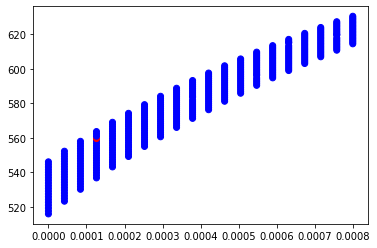

In [30]:
plt.scatter(b_trials,amax_res, c=color)

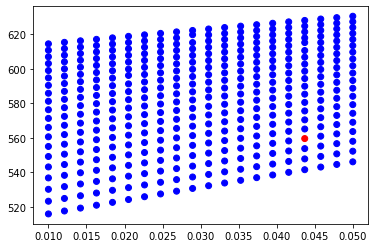

In [31]:
plt.scatter(k_trials,amax_res, c=color)

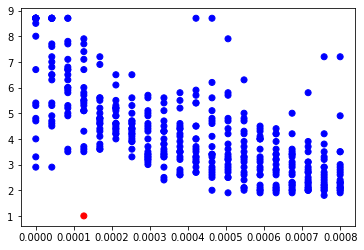

In [32]:
plt.scatter(b_trials,st_res, c=color)

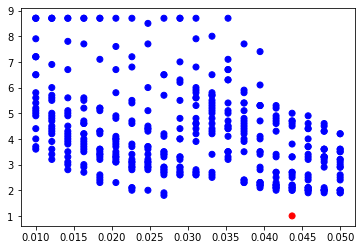

In [33]:
plt.scatter(k_trials,st_res, c=color)

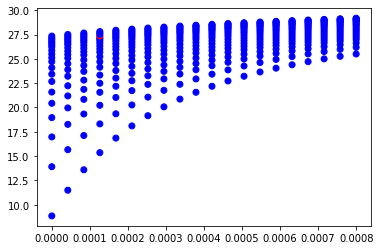

In [34]:
plt.scatter(b_trials,ymin_res, c=color)

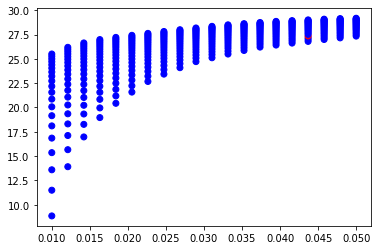

In [35]:
plt.scatter(k_trials,ymin_res, c=color)

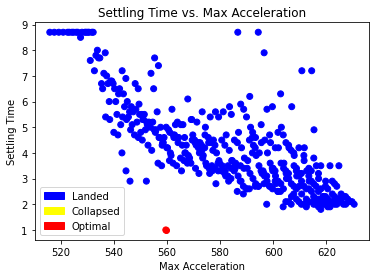

In [36]:
plt.scatter(amax_res,st_res, c=color)
plt.scatter(amax_res[np.argmin(perf)], st_res[np.argmin(perf)], c='red')
plt.title('Settling Time vs. Max Acceleration')
plt.xlabel('Max Acceleration')
plt.ylabel('Settling Time')
plt.legend(handles=[blue_patch, yellow_patch, red_patch])
plt.savefig('pareto.png')

In [ ]:
# Run the optimal simulation trial
args = [float(b_trials[np.argmin(perf)]), float(k_trials[np.argmin(perf)])]
states = run(args)

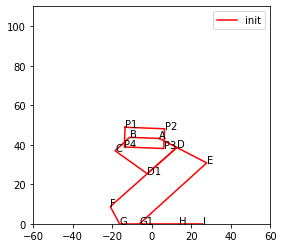

In [41]:
points_output, outputs = animate(states)